In [1]:
import pandas

from datetime import datetime, timedelta
from matplotlib import pyplot

In [2]:
df = pandas.read_csv("network_bound_2.csv")
df

,measurementID,version,lang,startTime,uuid,newcontainer,vmuptime,platform,containerID,functionName,...,cpuSoftIrq,vmcpusteal,contextSwitches,frameworkRuntime,runtime,endTime,network_rx_bytes.vinternal_1,network_rx_bytes.lo,network_rx_bytes.telemetry1_sb,network_rx_bytes.vtarget_1
0,0,0.5,python,1639134859381,25b91d9e-d9ed-40c6-962d-a4e9cde7b046,0,1639129707,AWS Lambda,2021/12/10/[$LATEST]0bd5b744c8494b3faa24e4985f...,root_lambda,...,9,81,63289,140,140,1639134859522,119552487,93691,176,0
1,1,0.5,python,1639134860523,25b91d9e-d9ed-40c6-962d-a4e9cde7b046,0,1639129707,AWS Lambda,2021/12/10/[$LATEST]0bd5b744c8494b3faa24e4985f...,root_lambda,...,9,81,64000,85,85,1639134860608,119554883,93691,176,0
2,2,0.5,python,1639134861610,25b91d9e-d9ed-40c6-962d-a4e9cde7b046,0,1639129707,AWS Lambda,2021/12/10/[$LATEST]0bd5b744c8494b3faa24e4985f...,root_lambda,...,9,81,64751,84,84,1639134861694,121235643,93691,176,0
3,3,0.5,python,1639134862695,25b91d9e-d9ed-40c6-962d-a4e9cde7b046,0,1639129707,AWS Lambda,2021/12/10/[$LATEST]0bd5b744c8494b3faa24e4985f...,root_lambda,...,9,82,65281,193,193,1639134862888,121358786,93691,176,0
4,4,0.5,python,1639134863890,25b91d9e-d9ed-40c6-962d-a4e9cde7b046,0,1639129707,AWS Lambda,2021/12/10/[$LATEST]0bd5b744c8494b3faa24e4985f...,root_lambda,...,9,82,66003,80,80,1639134863970,122839808,93691,176,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2286,32,0.5,python,1639134894853,d558c78e-4fb4-4e3a-b3f6-0fcbfeca3f06,0,1639131894,AWS Lambda,2021/12/10/[$LATEST]37cc85e83dd94d1482769ac353...,root_lambda,...,10,62,76871,83,83,1639134894936,171557572,112049,90,0
2287,33,0.5,python,1639134895937,d558c78e-4fb4-4e3a-b3f6-0fcbfeca3f06,0,1639131894,AWS Lambda,2021/12/10/[$LATEST]37cc85e83dd94d1482769ac353...,root_lambda,...,10,62,77578,84,85,1639134896022,178810462,112049,90,0
2288,34,0.5,python,1639134897023,d558c78e-4fb4-4e3a-b3f6-0fcbfeca3f06,0,1639131894,AWS Lambda,2021/12/10/[$LATEST]37cc85e83dd94d1482769ac353...,root_lambda,...,10,65,78171,168,168,1639134897191,181323375,112049,90,0
2289,35,0.5,python,1639134898193,d558c78e-4fb4-4e3a-b3f6-0fcbfeca3f06,0,1639131894,AWS Lambda,2021/12/10/[$LATEST]37cc85e83dd94d1482769ac353...,root_lambda,...,11,65,78845,79,80,1639134898273,181798995,112049,90,0


In [10]:
start_timestamp = df["startTime"].min() / 1000
end_timestamp = df["endTime"].max() / 1000
start_datetime = datetime.fromtimestamp(start_timestamp)
end_datetime = datetime.fromtimestamp(end_timestamp)

print(start_datetime)
print(end_datetime)
print(f"Total runtime: {round(end_timestamp - start_timestamp, 2)} seconds")

2021-12-10 12:14:19.160000
2021-12-10 12:15:15.756000
Total runtime: 56.6 seconds


Text(0, 0.5, 'Lambda invokation')

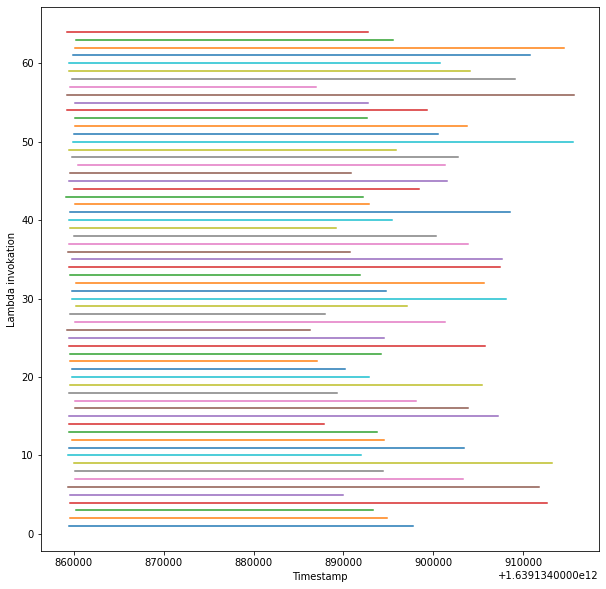

In [11]:
pyplot.figure(figsize=(10,10))
for number, (label, lambdadf) in enumerate(df.groupby("uuid")):
    pyplot.plot(lambdadf.groupby("startTime")["measurementID"].count()+ number)
pyplot.xlabel("Timestamp")
pyplot.ylabel("Lambda invokation")

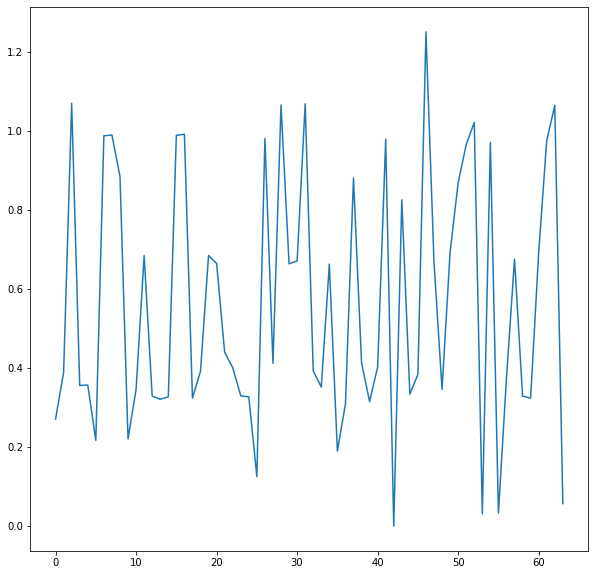

In [12]:
minstartdf = df.groupby('uuid')[["startTime"]].min().reset_index()
minstartdf["startTime"] = minstartdf["startTime"] / 1000

pyplot.figure(figsize=(10,10))
pyplot.plot(minstartdf.index, minstartdf["startTime"]-minstartdf["startTime"].min())

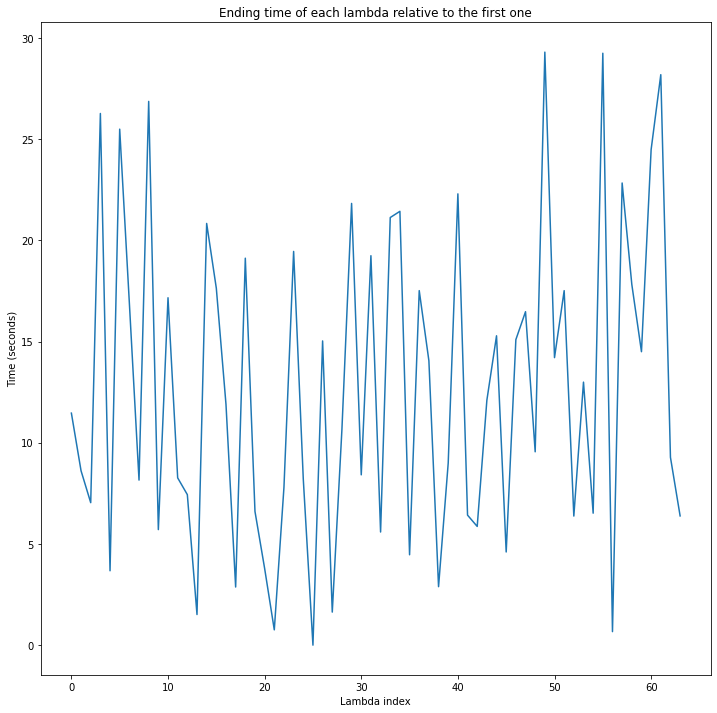

In [16]:
maxenddf = df.groupby('uuid')[["endTime"]].max().reset_index()
maxenddf["endTime"] = maxenddf["endTime"] / 1000

pyplot.figure(figsize=(12,12))
pyplot.title("Ending time of each lambda relative to the first one")
pyplot.xlabel("Lambda index")
pyplot.ylabel("Time (seconds)")
pyplot.plot(maxenddf.index, maxenddf["endTime"]-maxenddf["endTime"].min())

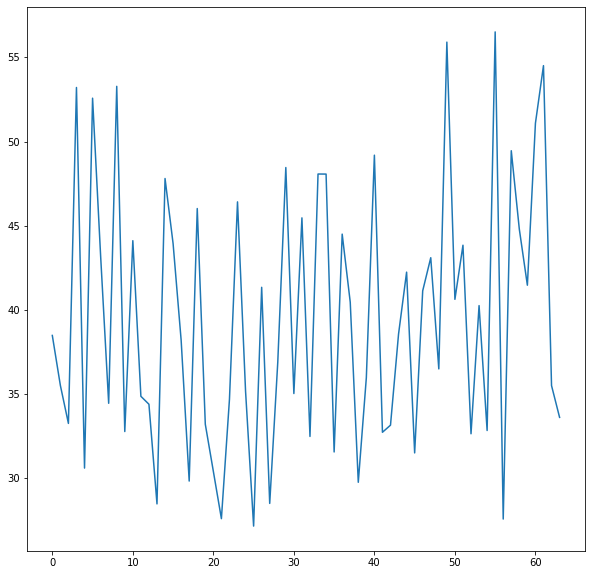

In [13]:
runtimedf = df.groupby('uuid')[["startTime","endTime"]].agg(minstart=("startTime","min"),maxend=("endTime","max")).reset_index()
runtimedf["runtime"] = (runtimedf["maxend"] - runtimedf["minstart"]) / 1000
runtimedf

pyplot.figure(figsize=(10,10))
pyplot.plot(runtimedf.index, runtimedf["runtime"])

In [17]:
cpudf = df[["uuid","startTime","endTime","cpuUsr"]]
cpudf

,uuid,startTime,endTime,cpuUsr
0,25b91d9e-d9ed-40c6-962d-a4e9cde7b046,1639134859381,1639134859522,2070
1,25b91d9e-d9ed-40c6-962d-a4e9cde7b046,1639134860523,1639134860608,2073
2,25b91d9e-d9ed-40c6-962d-a4e9cde7b046,1639134861610,1639134861694,2076
3,25b91d9e-d9ed-40c6-962d-a4e9cde7b046,1639134862695,1639134862888,2166
4,25b91d9e-d9ed-40c6-962d-a4e9cde7b046,1639134863890,1639134863970,2188
...,...,...,...,...
2286,d558c78e-4fb4-4e3a-b3f6-0fcbfeca3f06,1639134894853,1639134894936,2958
2287,d558c78e-4fb4-4e3a-b3f6-0fcbfeca3f06,1639134895937,1639134896022,2959
2288,d558c78e-4fb4-4e3a-b3f6-0fcbfeca3f06,1639134897023,1639134897191,3040
2289,d558c78e-4fb4-4e3a-b3f6-0fcbfeca3f06,1639134898193,1639134898273,3083


In [18]:
dfs = []
for label, curdf in cpudf.groupby('uuid'):
    curdf["cpuPercent"] = curdf.cpuUsr.diff().shift(-1)
    dfs.append(curdf)


cpupercentdf = pandas.concat(dfs).reset_index(drop=True)
cpupercentdf["startDateTime"] = (cpupercentdf["startTime"]/pow(10,3)).apply(datetime.fromtimestamp)
cpupercentdf

,uuid,startTime,endTime,cpuUsr,cpuPercent,startDateTime
0,03b7e038-de02-49cf-8788-18aebd6305f7,1639134859431,1639134859579,1929,1.0,2021-12-10 12:14:19.431
1,03b7e038-de02-49cf-8788-18aebd6305f7,1639134860580,1639134860676,1930,7.0,2021-12-10 12:14:20.580
2,03b7e038-de02-49cf-8788-18aebd6305f7,1639134861677,1639134861861,1937,98.0,2021-12-10 12:14:21.677
3,03b7e038-de02-49cf-8788-18aebd6305f7,1639134862862,1639134863036,2035,1.0,2021-12-10 12:14:22.862
4,03b7e038-de02-49cf-8788-18aebd6305f7,1639134864037,1639134864128,2036,1.0,2021-12-10 12:14:24.037
...,...,...,...,...,...,...
2286,f3becc8c-c035-47b3-8727-e2d4e0e60889,1639134888212,1639134888298,2868,72.0,2021-12-10 12:14:48.212
2287,f3becc8c-c035-47b3-8727-e2d4e0e60889,1639134889299,1639134889485,2940,50.0,2021-12-10 12:14:49.299
2288,f3becc8c-c035-47b3-8727-e2d4e0e60889,1639134890486,1639134890565,2990,42.0,2021-12-10 12:14:50.486
2289,f3becc8c-c035-47b3-8727-e2d4e0e60889,1639134891566,1639134891766,3032,76.0,2021-12-10 12:14:51.566


In [19]:
networkdf = df[["uuid","startTime","endTime","network_rx_bytes.vinternal_1"]]
dfs = []
for label, curdf in networkdf.groupby('uuid'):
    curdf["networkpersecond"] = curdf["network_rx_bytes.vinternal_1"].diff().shift(-1)
    dfs.append(curdf)


networkperseconddf = pandas.concat(dfs).reset_index(drop=True)
networkperseconddf["startDateTime"] = (networkperseconddf["startTime"]/pow(10,3)).apply(datetime.fromtimestamp)
networkperseconddf

,uuid,startTime,endTime,network_rx_bytes.vinternal_1,networkpersecond,startDateTime
0,03b7e038-de02-49cf-8788-18aebd6305f7,1639134859431,1639134859579,91829271,2853.0,2021-12-10 12:14:19.431
1,03b7e038-de02-49cf-8788-18aebd6305f7,1639134860580,1639134860676,91832124,1276143.0,2021-12-10 12:14:20.580
2,03b7e038-de02-49cf-8788-18aebd6305f7,1639134861677,1639134861861,93108267,0.0,2021-12-10 12:14:21.677
3,03b7e038-de02-49cf-8788-18aebd6305f7,1639134862862,1639134863036,93108267,583894.0,2021-12-10 12:14:22.862
4,03b7e038-de02-49cf-8788-18aebd6305f7,1639134864037,1639134864128,93692161,3644725.0,2021-12-10 12:14:24.037
...,...,...,...,...,...,...
2286,f3becc8c-c035-47b3-8727-e2d4e0e60889,1639134888212,1639134888298,171744544,4249205.0,2021-12-10 12:14:48.212
2287,f3becc8c-c035-47b3-8727-e2d4e0e60889,1639134889299,1639134889485,175993749,1389766.0,2021-12-10 12:14:49.299
2288,f3becc8c-c035-47b3-8727-e2d4e0e60889,1639134890486,1639134890565,177383515,9059863.0,2021-12-10 12:14:50.486
2289,f3becc8c-c035-47b3-8727-e2d4e0e60889,1639134891566,1639134891766,186443378,535282.0,2021-12-10 12:14:51.566


In [20]:
metrics = df[["uuid","startTime","cpuUsr","network_rx_bytes.vinternal_1"]].copy()
metrics

,uuid,startTime,cpuUsr,network_rx_bytes.vinternal_1
0,25b91d9e-d9ed-40c6-962d-a4e9cde7b046,1639134859381,2070,119552487
1,25b91d9e-d9ed-40c6-962d-a4e9cde7b046,1639134860523,2073,119554883
2,25b91d9e-d9ed-40c6-962d-a4e9cde7b046,1639134861610,2076,121235643
3,25b91d9e-d9ed-40c6-962d-a4e9cde7b046,1639134862695,2166,121358786
4,25b91d9e-d9ed-40c6-962d-a4e9cde7b046,1639134863890,2188,122839808
...,...,...,...,...
2286,d558c78e-4fb4-4e3a-b3f6-0fcbfeca3f06,1639134894853,2958,171557572
2287,d558c78e-4fb4-4e3a-b3f6-0fcbfeca3f06,1639134895937,2959,178810462
2288,d558c78e-4fb4-4e3a-b3f6-0fcbfeca3f06,1639134897023,3040,181323375
2289,d558c78e-4fb4-4e3a-b3f6-0fcbfeca3f06,1639134898193,3083,181798995


In [21]:
metrics["startDateTime"] = (metrics["startTime"]/pow(10,3)).apply(datetime.fromtimestamp)
metrics

,uuid,startTime,cpuUsr,network_rx_bytes.vinternal_1,startDateTime
0,25b91d9e-d9ed-40c6-962d-a4e9cde7b046,1639134859381,2070,119552487,2021-12-10 12:14:19.381
1,25b91d9e-d9ed-40c6-962d-a4e9cde7b046,1639134860523,2073,119554883,2021-12-10 12:14:20.523
2,25b91d9e-d9ed-40c6-962d-a4e9cde7b046,1639134861610,2076,121235643,2021-12-10 12:14:21.610
3,25b91d9e-d9ed-40c6-962d-a4e9cde7b046,1639134862695,2166,121358786,2021-12-10 12:14:22.695
4,25b91d9e-d9ed-40c6-962d-a4e9cde7b046,1639134863890,2188,122839808,2021-12-10 12:14:23.890
...,...,...,...,...,...
2286,d558c78e-4fb4-4e3a-b3f6-0fcbfeca3f06,1639134894853,2958,171557572,2021-12-10 12:14:54.853
2287,d558c78e-4fb4-4e3a-b3f6-0fcbfeca3f06,1639134895937,2959,178810462,2021-12-10 12:14:55.937
2288,d558c78e-4fb4-4e3a-b3f6-0fcbfeca3f06,1639134897023,3040,181323375,2021-12-10 12:14:57.023
2289,d558c78e-4fb4-4e3a-b3f6-0fcbfeca3f06,1639134898193,3083,181798995,2021-12-10 12:14:58.193


In [22]:
def round_seconds(obj: datetime, how="previous") -> datetime:
    if how=="previous":
        obj -= timedelta(seconds=1)
    else:
        obj += timedelta(seconds=1)
    return obj.replace(microsecond=0)

timebins = []
current_datetime = round_seconds(start_datetime)
while current_datetime <= end_datetime:
    timebins.append(current_datetime)
    current_datetime += timedelta(seconds=2)
timebins.append(round_seconds(end_datetime, how="next"))
timebins

[datetime.datetime(2021, 12, 10, 12, 14, 18),
 datetime.datetime(2021, 12, 10, 12, 14, 20),
 datetime.datetime(2021, 12, 10, 12, 14, 22),
 datetime.datetime(2021, 12, 10, 12, 14, 24),
 datetime.datetime(2021, 12, 10, 12, 14, 26),
 datetime.datetime(2021, 12, 10, 12, 14, 28),
 datetime.datetime(2021, 12, 10, 12, 14, 30),
 datetime.datetime(2021, 12, 10, 12, 14, 32),
 datetime.datetime(2021, 12, 10, 12, 14, 34),
 datetime.datetime(2021, 12, 10, 12, 14, 36),
 datetime.datetime(2021, 12, 10, 12, 14, 38),
 datetime.datetime(2021, 12, 10, 12, 14, 40),
 datetime.datetime(2021, 12, 10, 12, 14, 42),
 datetime.datetime(2021, 12, 10, 12, 14, 44),
 datetime.datetime(2021, 12, 10, 12, 14, 46),
 datetime.datetime(2021, 12, 10, 12, 14, 48),
 datetime.datetime(2021, 12, 10, 12, 14, 50),
 datetime.datetime(2021, 12, 10, 12, 14, 52),
 datetime.datetime(2021, 12, 10, 12, 14, 54),
 datetime.datetime(2021, 12, 10, 12, 14, 56),
 datetime.datetime(2021, 12, 10, 12, 14, 58),
 datetime.datetime(2021, 12, 10, 1

In [23]:
metrics["bins"] = pandas.cut(metrics["startDateTime"], timebins)
metrics

,uuid,startTime,cpuUsr,network_rx_bytes.vinternal_1,startDateTime,bins
0,25b91d9e-d9ed-40c6-962d-a4e9cde7b046,1639134859381,2070,119552487,2021-12-10 12:14:19.381,"(2021-12-10 12:14:18, 2021-12-10 12:14:20]"
1,25b91d9e-d9ed-40c6-962d-a4e9cde7b046,1639134860523,2073,119554883,2021-12-10 12:14:20.523,"(2021-12-10 12:14:20, 2021-12-10 12:14:22]"
2,25b91d9e-d9ed-40c6-962d-a4e9cde7b046,1639134861610,2076,121235643,2021-12-10 12:14:21.610,"(2021-12-10 12:14:20, 2021-12-10 12:14:22]"
3,25b91d9e-d9ed-40c6-962d-a4e9cde7b046,1639134862695,2166,121358786,2021-12-10 12:14:22.695,"(2021-12-10 12:14:22, 2021-12-10 12:14:24]"
4,25b91d9e-d9ed-40c6-962d-a4e9cde7b046,1639134863890,2188,122839808,2021-12-10 12:14:23.890,"(2021-12-10 12:14:22, 2021-12-10 12:14:24]"
...,...,...,...,...,...,...
2286,d558c78e-4fb4-4e3a-b3f6-0fcbfeca3f06,1639134894853,2958,171557572,2021-12-10 12:14:54.853,"(2021-12-10 12:14:54, 2021-12-10 12:14:56]"
2287,d558c78e-4fb4-4e3a-b3f6-0fcbfeca3f06,1639134895937,2959,178810462,2021-12-10 12:14:55.937,"(2021-12-10 12:14:54, 2021-12-10 12:14:56]"
2288,d558c78e-4fb4-4e3a-b3f6-0fcbfeca3f06,1639134897023,3040,181323375,2021-12-10 12:14:57.023,"(2021-12-10 12:14:56, 2021-12-10 12:14:58]"
2289,d558c78e-4fb4-4e3a-b3f6-0fcbfeca3f06,1639134898193,3083,181798995,2021-12-10 12:14:58.193,"(2021-12-10 12:14:58, 2021-12-10 12:15:00]"


Text(0, 0.5, 'Lambda invokation')

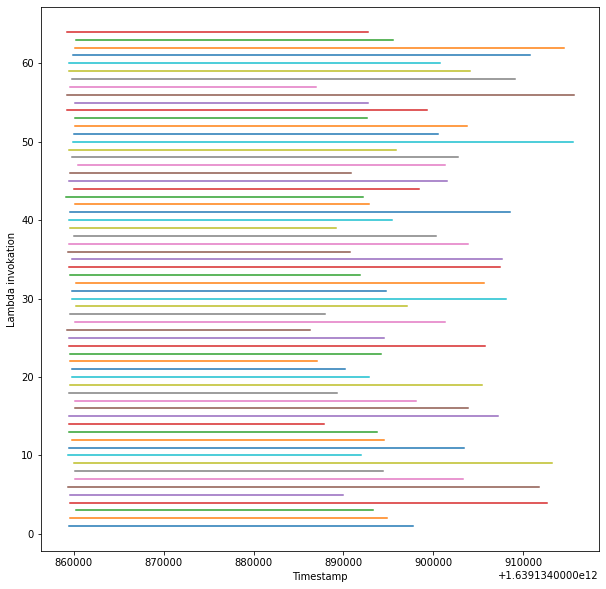

In [24]:
pyplot.figure(figsize=(10,10))
for number, (label, lambdadf) in enumerate(metrics.groupby("uuid")):
    pyplot.plot(lambdadf.groupby("startTime")["cpuUsr"].count() + number)
pyplot.xlabel("Timestamp")
pyplot.ylabel("Lambda invokation")

In [25]:
for value in metrics.loc[0]:
    print(value)

25b91d9e-d9ed-40c6-962d-a4e9cde7b046
1639134859381
2070
119552487
2021-12-10 12:14:19.381000
(2021-12-10 12:14:18, 2021-12-10 12:14:20]


In [26]:
for grouplabel, groupdf in metrics.groupby(["bins"]):
    #print(f"Label: {grouplabel}")
    print(f"Entries: {len(groupdf)}")
    #print(f"DataFrame: {groupdf}")
    print(len(groupdf.uuid.unique()))

Entries: 46
46
Entries: 117
64
Entries: 105
64
Entries: 116
64
Entries: 113
64
Entries: 121
64
Entries: 110
64
Entries: 106
64
Entries: 114
64
Entries: 119
64
Entries: 113
64
Entries: 112
64
Entries: 108
64
Entries: 117
64
Entries: 115
64
Entries: 106
59
Entries: 92
56
Entries: 90
51
Entries: 71
43
Entries: 60
34
Entries: 56
32
Entries: 49
29
Entries: 41
23
Entries: 29
17
Entries: 24
13
Entries: 16
10
Entries: 11
7
Entries: 9
5
Entries: 5
3


In [27]:
cpupercentdf["bins"] = pandas.cut(cpupercentdf["startDateTime"], timebins)
cpupercentdf

,uuid,startTime,endTime,cpuUsr,cpuPercent,startDateTime,bins
0,03b7e038-de02-49cf-8788-18aebd6305f7,1639134859431,1639134859579,1929,1.0,2021-12-10 12:14:19.431,"(2021-12-10 12:14:18, 2021-12-10 12:14:20]"
1,03b7e038-de02-49cf-8788-18aebd6305f7,1639134860580,1639134860676,1930,7.0,2021-12-10 12:14:20.580,"(2021-12-10 12:14:20, 2021-12-10 12:14:22]"
2,03b7e038-de02-49cf-8788-18aebd6305f7,1639134861677,1639134861861,1937,98.0,2021-12-10 12:14:21.677,"(2021-12-10 12:14:20, 2021-12-10 12:14:22]"
3,03b7e038-de02-49cf-8788-18aebd6305f7,1639134862862,1639134863036,2035,1.0,2021-12-10 12:14:22.862,"(2021-12-10 12:14:22, 2021-12-10 12:14:24]"
4,03b7e038-de02-49cf-8788-18aebd6305f7,1639134864037,1639134864128,2036,1.0,2021-12-10 12:14:24.037,"(2021-12-10 12:14:24, 2021-12-10 12:14:26]"
...,...,...,...,...,...,...,...
2286,f3becc8c-c035-47b3-8727-e2d4e0e60889,1639134888212,1639134888298,2868,72.0,2021-12-10 12:14:48.212,"(2021-12-10 12:14:48, 2021-12-10 12:14:50]"
2287,f3becc8c-c035-47b3-8727-e2d4e0e60889,1639134889299,1639134889485,2940,50.0,2021-12-10 12:14:49.299,"(2021-12-10 12:14:48, 2021-12-10 12:14:50]"
2288,f3becc8c-c035-47b3-8727-e2d4e0e60889,1639134890486,1639134890565,2990,42.0,2021-12-10 12:14:50.486,"(2021-12-10 12:14:50, 2021-12-10 12:14:52]"
2289,f3becc8c-c035-47b3-8727-e2d4e0e60889,1639134891566,1639134891766,3032,76.0,2021-12-10 12:14:51.566,"(2021-12-10 12:14:50, 2021-12-10 12:14:52]"


In [28]:
networkperseconddf["bins"] = pandas.cut(networkperseconddf["startDateTime"], timebins)
networkperseconddf

,uuid,startTime,endTime,network_rx_bytes.vinternal_1,networkpersecond,startDateTime,bins
0,03b7e038-de02-49cf-8788-18aebd6305f7,1639134859431,1639134859579,91829271,2853.0,2021-12-10 12:14:19.431,"(2021-12-10 12:14:18, 2021-12-10 12:14:20]"
1,03b7e038-de02-49cf-8788-18aebd6305f7,1639134860580,1639134860676,91832124,1276143.0,2021-12-10 12:14:20.580,"(2021-12-10 12:14:20, 2021-12-10 12:14:22]"
2,03b7e038-de02-49cf-8788-18aebd6305f7,1639134861677,1639134861861,93108267,0.0,2021-12-10 12:14:21.677,"(2021-12-10 12:14:20, 2021-12-10 12:14:22]"
3,03b7e038-de02-49cf-8788-18aebd6305f7,1639134862862,1639134863036,93108267,583894.0,2021-12-10 12:14:22.862,"(2021-12-10 12:14:22, 2021-12-10 12:14:24]"
4,03b7e038-de02-49cf-8788-18aebd6305f7,1639134864037,1639134864128,93692161,3644725.0,2021-12-10 12:14:24.037,"(2021-12-10 12:14:24, 2021-12-10 12:14:26]"
...,...,...,...,...,...,...,...
2286,f3becc8c-c035-47b3-8727-e2d4e0e60889,1639134888212,1639134888298,171744544,4249205.0,2021-12-10 12:14:48.212,"(2021-12-10 12:14:48, 2021-12-10 12:14:50]"
2287,f3becc8c-c035-47b3-8727-e2d4e0e60889,1639134889299,1639134889485,175993749,1389766.0,2021-12-10 12:14:49.299,"(2021-12-10 12:14:48, 2021-12-10 12:14:50]"
2288,f3becc8c-c035-47b3-8727-e2d4e0e60889,1639134890486,1639134890565,177383515,9059863.0,2021-12-10 12:14:50.486,"(2021-12-10 12:14:50, 2021-12-10 12:14:52]"
2289,f3becc8c-c035-47b3-8727-e2d4e0e60889,1639134891566,1639134891766,186443378,535282.0,2021-12-10 12:14:51.566,"(2021-12-10 12:14:50, 2021-12-10 12:14:52]"


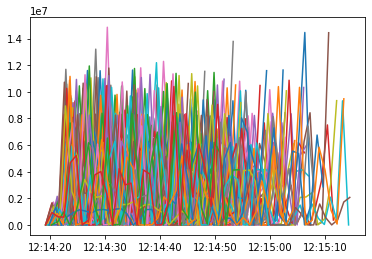

In [30]:
for label, curdf in networkperseconddf.groupby("uuid"):
    pyplot.plot(curdf["startDateTime"], curdf["networkpersecond"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe3665419f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe366541f90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe366541720>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe366542530>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe366542800>],
 'means': []}

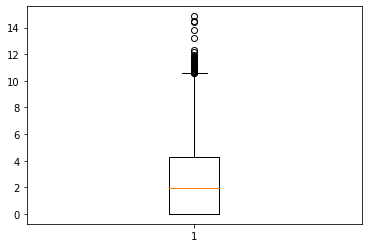

In [31]:
pyplot.boxplot(networkperseconddf["networkpersecond"].dropna()/pow(10,6))

In [32]:
for grouplabel, groupdf in cpupercentdf.groupby(["bins"]):
    #print(f"Label: {grouplabel}")
    print(f"Entries: {len(groupdf)}")
    #print(f"DataFrame: {groupdf}")
    print(len(groupdf.uuid.unique()))

Entries: 46
46
Entries: 117
64
Entries: 105
64
Entries: 116
64
Entries: 113
64
Entries: 121
64
Entries: 110
64
Entries: 106
64
Entries: 114
64
Entries: 119
64
Entries: 113
64
Entries: 112
64
Entries: 108
64
Entries: 117
64
Entries: 115
64
Entries: 106
59
Entries: 92
56
Entries: 90
51
Entries: 71
43
Entries: 60
34
Entries: 56
32
Entries: 49
29
Entries: 41
23
Entries: 29
17
Entries: 24
13
Entries: 16
10
Entries: 11
7
Entries: 9
5
Entries: 5
3


In [33]:
def f(series):
    return len(series.unique())
cpusumdf = metrics.groupby("bins").agg(cpu_sum=("cpuUsr","sum"), numlambdas=("uuid",f)).reset_index()
cpusumdf

,bins,cpu_sum,numlambdas
0,"(2021-12-10 12:14:18, 2021-12-10 12:14:20]",188960,46
1,"(2021-12-10 12:14:20, 2021-12-10 12:14:22]",647769,64
2,"(2021-12-10 12:14:22, 2021-12-10 12:14:24]",594930,64
3,"(2021-12-10 12:14:24, 2021-12-10 12:14:26]",651243,64
4,"(2021-12-10 12:14:26, 2021-12-10 12:14:28]",590687,64
5,"(2021-12-10 12:14:28, 2021-12-10 12:14:30]",686341,64
6,"(2021-12-10 12:14:30, 2021-12-10 12:14:32]",642278,64
7,"(2021-12-10 12:14:32, 2021-12-10 12:14:34]",622696,64
8,"(2021-12-10 12:14:34, 2021-12-10 12:14:36]",657378,64
9,"(2021-12-10 12:14:36, 2021-12-10 12:14:38]",686499,64


In [34]:
cpusumdfpercent = cpupercentdf.groupby("bins").agg(cpu_sum=("cpuPercent","sum"), numlambdas=("uuid",f)).reset_index()
cpusumdfpercent

,bins,cpu_sum,numlambdas
0,"(2021-12-10 12:14:18, 2021-12-10 12:14:20]",53.0,46
1,"(2021-12-10 12:14:20, 2021-12-10 12:14:22]",3525.0,64
2,"(2021-12-10 12:14:22, 2021-12-10 12:14:24]",4102.0,64
3,"(2021-12-10 12:14:24, 2021-12-10 12:14:26]",4191.0,64
4,"(2021-12-10 12:14:26, 2021-12-10 12:14:28]",3689.0,64
5,"(2021-12-10 12:14:28, 2021-12-10 12:14:30]",4547.0,64
6,"(2021-12-10 12:14:30, 2021-12-10 12:14:32]",4362.0,64
7,"(2021-12-10 12:14:32, 2021-12-10 12:14:34]",3388.0,64
8,"(2021-12-10 12:14:34, 2021-12-10 12:14:36]",4379.0,64
9,"(2021-12-10 12:14:36, 2021-12-10 12:14:38]",4393.0,64


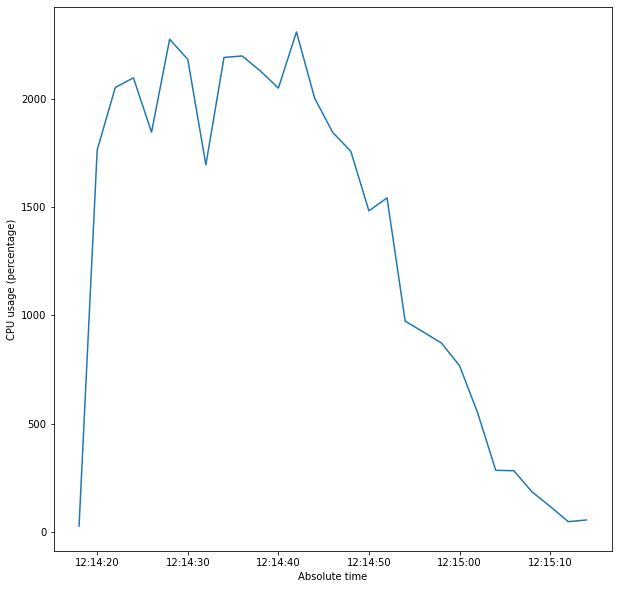

In [35]:
fig, ax = pyplot.subplots(figsize=(10,10))
pyplot.plot(cpusumdfpercent["bins"].apply(lambda x: x.left), cpusumdfpercent["cpu_sum"]/2, label="CPU Usage")
pyplot.xlabel("Absolute time")
pyplot.ylabel("CPU usage (percentage)")
fig.savefig('cpuusage.png',
            format='png',
            dpi=300,
            bbox_inches='tight')

In [36]:
cpusumdfpercent["bins"].apply(lambda x: x.left)

0    2021-12-10 12:14:18
1    2021-12-10 12:14:20
2    2021-12-10 12:14:22
3    2021-12-10 12:14:24
4    2021-12-10 12:14:26
5    2021-12-10 12:14:28
6    2021-12-10 12:14:30
7    2021-12-10 12:14:32
8    2021-12-10 12:14:34
9    2021-12-10 12:14:36
10   2021-12-10 12:14:38
11   2021-12-10 12:14:40
12   2021-12-10 12:14:42
13   2021-12-10 12:14:44
14   2021-12-10 12:14:46
15   2021-12-10 12:14:48
16   2021-12-10 12:14:50
17   2021-12-10 12:14:52
18   2021-12-10 12:14:54
19   2021-12-10 12:14:56
20   2021-12-10 12:14:58
21   2021-12-10 12:15:00
22   2021-12-10 12:15:02
23   2021-12-10 12:15:04
24   2021-12-10 12:15:06
25   2021-12-10 12:15:08
26   2021-12-10 12:15:10
27   2021-12-10 12:15:12
28   2021-12-10 12:15:14
Name: bins, dtype: category
Categories (29, datetime64[ns]): [2021-12-10 12:14:18 < 2021-12-10 12:14:20 < 2021-12-10 12:14:22 < 2021-12-10 12:14:24 ... 2021-12-10 12:15:08 < 2021-12-10 12:15:10 < 2021-12-10 12:15:12 < 2021-12-10 12:15:14]

In [37]:
networksumdf = metrics.groupby("bins").agg(network_sum=("network_rx_bytes.vinternal_1","sum"), numlambdas=("uuid",f)).reset_index()
networksumdf

,bins,network_sum,numlambdas
0,"(2021-12-10 12:14:18, 2021-12-10 12:14:20]",4573409217,46
1,"(2021-12-10 12:14:20, 2021-12-10 12:14:22]",11504549452,64
2,"(2021-12-10 12:14:22, 2021-12-10 12:14:24]",10421900003,64
3,"(2021-12-10 12:14:24, 2021-12-10 12:14:26]",12094437267,64
4,"(2021-12-10 12:14:26, 2021-12-10 12:14:28]",12437414051,64
5,"(2021-12-10 12:14:28, 2021-12-10 12:14:30]",14024412168,64
6,"(2021-12-10 12:14:30, 2021-12-10 12:14:32]",13312589894,64
7,"(2021-12-10 12:14:32, 2021-12-10 12:14:34]",13319143593,64
8,"(2021-12-10 12:14:34, 2021-12-10 12:14:36]",15003697944,64
9,"(2021-12-10 12:14:36, 2021-12-10 12:14:38]",16318341187,64


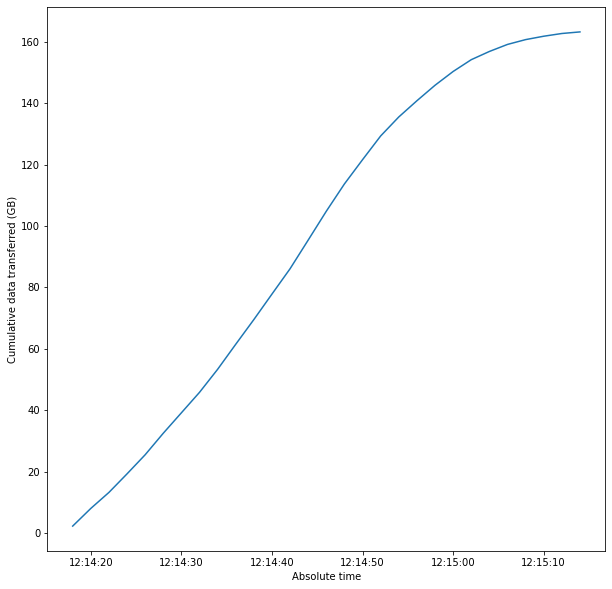

In [46]:
networkcumsumdf = metrics[["bins","network_rx_bytes.vinternal_1"]].groupby("bins").sum().cumsum().reset_index()
fig, ax = pyplot.subplots(figsize=(10,10))
pyplot.plot(networkcumsumdf["bins"].apply(lambda x: x.left), networkcumsumdf["network_rx_bytes.vinternal_1"]/pow(10,9)/2, label="Data Transferred")
pyplot.xlabel("Absolute time")
pyplot.ylabel("Cumulative data transferred (GB)")
fig.savefig('network_sum.png',
            format='png',
            dpi=300,
            bbox_inches='tight')

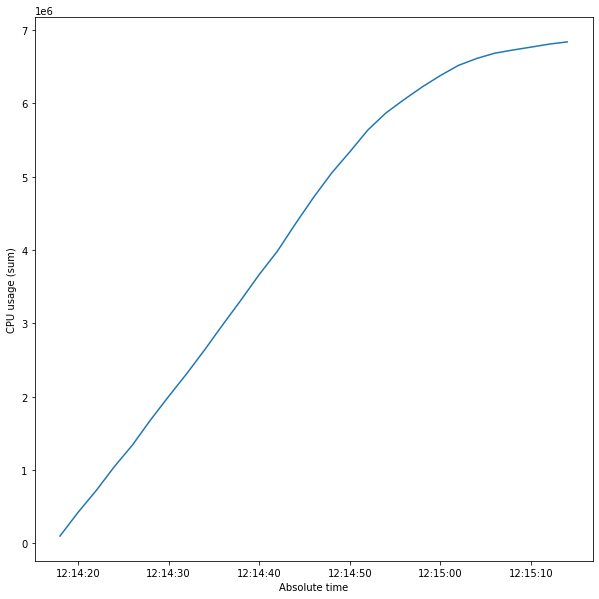

In [39]:
cpucumsumdf = cpusumdf[["bins","cpu_sum"]].groupby("bins").sum().cumsum().reset_index()

fig, ax = pyplot.subplots(figsize=(10,10))
pyplot.plot(cpucumsumdf["bins"].apply(lambda x: x.left), cpucumsumdf["cpu_sum"]/2, label="CPU Usage")
pyplot.xlabel("Absolute time")
pyplot.ylabel("CPU usage (sum)")
fig.savefig('cpuusage_sum.png',
            format='png',
            dpi=300,
            bbox_inches='tight')

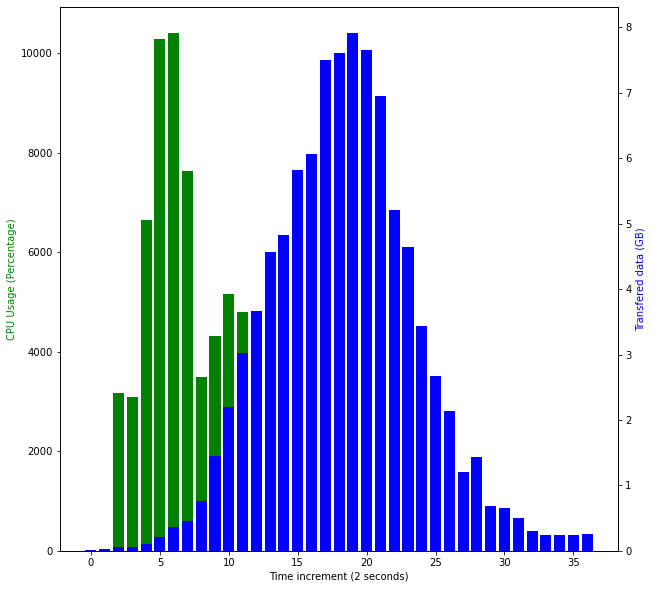

In [25]:
fig,ax = pyplot.subplots(figsize=(10,10))
ax.bar(cpusumdfpercent.index, cpusumdfpercent["cpu_sum"], color="green")
ax.set_ylabel("CPU Usage (Percentage)", color="green")
ax2 = ax.twinx()
ax2.bar(networksumdf.index, networksumdf["network_sum"]/pow(10,9), color="blue")
ax2.set_ylabel("Transfered data (GB)", color="blue")
ax.set_xlabel("Time increment (2 seconds)")
fig.savefig('cpuandnetwork.png',
            format='png',
            dpi=300,
            bbox_inches='tight')

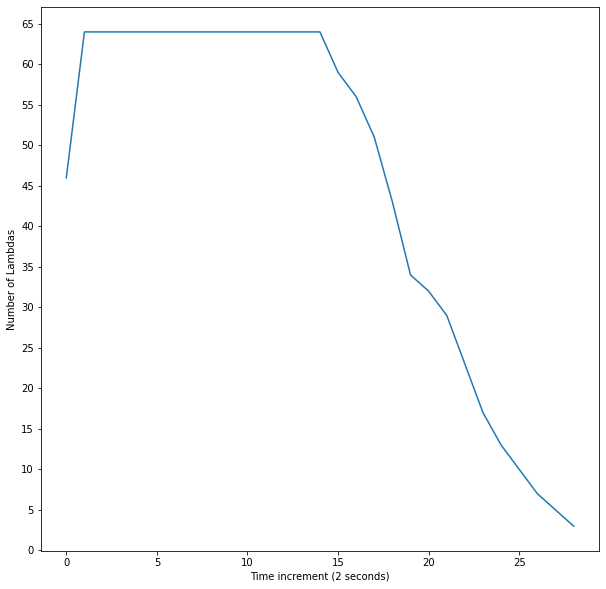

In [40]:
fig,ax = pyplot.subplots(figsize=(10,10))
ax.plot(cpusumdf["numlambdas"])
pyplot.yticks(list(range(0,70,5)))
pyplot.xlabel("Time increment (2 seconds)")
pyplot.ylabel("Number of Lambdas")
fig.savefig('numlambdas.png',
            format='png',
            dpi=300,
            bbox_inches='tight')

Text(0, 0.5, 'CPU Usage (Percentage)')

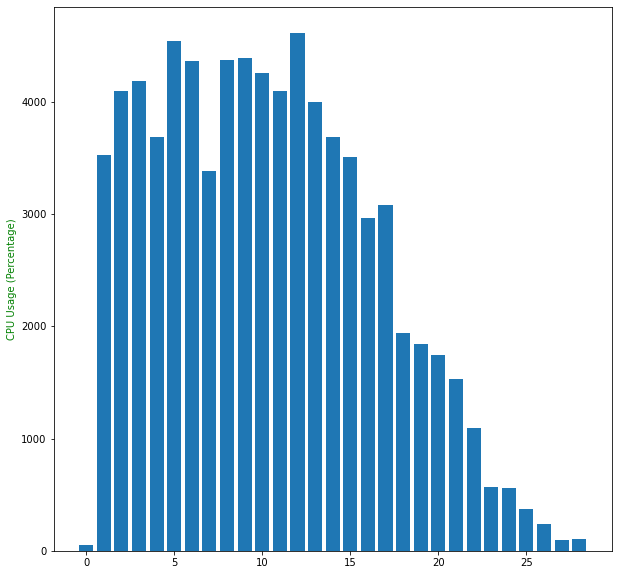

In [41]:
fig,ax = pyplot.subplots(figsize=(10,10))
ax.bar(cpusumdfpercent.index, cpusumdfpercent["cpu_sum"])
ax.set_ylabel("CPU Usage (Percentage)", color="green")
